In [4]:
import sys
sys.path.append("/Users/maithoma/work/github/bayesLearn/scripts/")
from Entro import *
%matplotlib inline

try:
    reload(bayesLib)
    reload(bayesLibPlot)
except:
    import bayesLib
    import bayesLibPlot

from bayesLib import *
from bayesLibPlot import *

In [6]:
dicParticipants = makeDicParticipants(div_displace=False,grid_distance=False,overwrite=False,save=False)
allDic = makeAllDic(dicParticipants,overwrite=False,save=False)

### [in fact, at each submission, we observe the outcome of a (multiplicative?) process which leads to a power law distribution of coarse-grained increments between k and k+1]


In [7]:
# Compute Error given grid and n-dim :
digits = 1
dim = 8
np.sqrt(dim*(0.5*10**-digits)**2)/8.

0.017677669529663691

LinregressResult(slope=-0.23309732581401246, intercept=-0.23162088927341523, rvalue=-0.21217114839324488, pvalue=1.4413418518716264e-74, stderr=0.012611587156597541)
LinregressResult(slope=-0.26195494399492741, intercept=-0.24739955461342988, rvalue=-0.32276526545924572, pvalue=4.0154654503487885e-223, stderr=0.0079899550224999758)


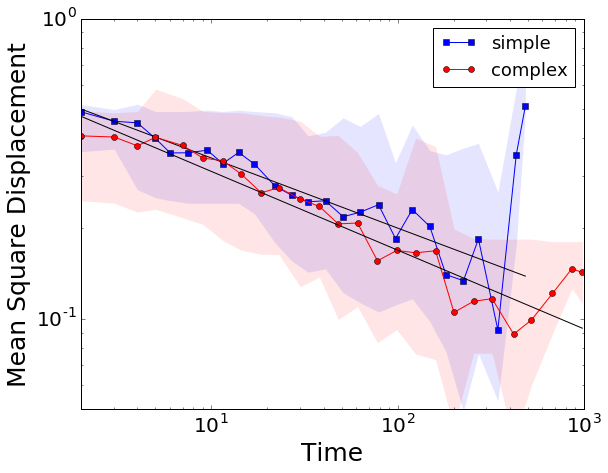

In [923]:

pl.figure(1,(9,7))
for treatment in allDic.keys():
    I = []
    MSD = []

    for key in dicParticipants.keys():
        if not dicParticipants[key]['treatment'] == treatment : continue
        models = dicParticipants[key]['models']

        #print key,len(models)
        for i,model in enumerate(models):
            msd = np.sum((np.array(model)-np.array(model[0]))**2)
            #print msd
            MSD.append(msd)
            I.append(i)

    MSD = np.array(MSD)
    I  = np.array(I)

    lx,ly = logify(I,MSD)

    cond = (lx > 0)*(lx < 3)

    fit = S.linregress(lx[cond],ly[cond])
    print fit

    B = binning(lx[cond],ly[cond],30,confinter=25)
    #pl.loglog(I,MSD,'.')
    pl.fill_between(10**B['bins'],10**B['percDown'],10**B['percUp'],color=allDic[treatment]['plot']['color'],alpha = 0.1,lw=0)
    pl.loglog(10**B['bins'],10**B['mean'],marker=allDic[treatment]['plot']['marker'],color=allDic[treatment]['plot']['color'],label=treatment)
    pl.loglog(10**B['bins'],10**(B['bins']*fit[0]+fit[1]),'k-')
pl.xlabel("Time")
pl.ylabel('Mean Square Displacement')
pl.ylim(0.05,1)
pl.xlim(xmin=2)
pl.legend(loc=0)
pl.savefig(dir + "Figures/MSD_2.eps")

LinregressResult(slope=-0.26669686682431765, intercept=-2.3496633554312525, rvalue=-0.038423379856630122, pvalue=0.0016597661323206159, stderr=0.084760557249665289)
LinregressResult(slope=-0.56711714188792295, intercept=-1.7760935801652169, rvalue=-0.081347434825727288, pvalue=6.2910438853674148e-11, stderr=0.08661221942648703)


(1e-05, 0.10000000000000001)

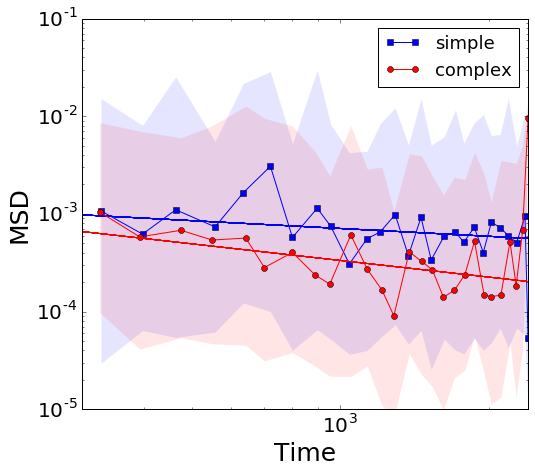

In [902]:
pl.figure(1,(8,7))
for treatment in allDic.keys():

    T = allDic[treatment]['values']['T']
    dR = allDic[treatment]['values']['dR']

    cond = (dR > 1e-4)*(T > 60*5)*(T < 2500)

    T = T[cond]
    dR = dR[cond]
    MSD = (dR**2)#/np.arange(1,len(dR)+1)

    lx,ly = logify(T,MSD)

    scaling = S.linregress(lx,ly)
    print scaling

    B = binning(T,MSD,30,confinter=25)

    #pl.semilogy(T,MSD,'.')
    pl.loglog(B['bins'],B['median'],marker=allDic[treatment]['plot']['marker'],color=allDic[treatment]['plot']['color'],label=treatment)
    pl.loglog(10**lx,10**(lx*scaling[0] + scaling[1]),color=allDic[treatment]['plot']['color'])
    pl.fill_between(B['bins'],B['percDown'],B['percUp'],color=allDic[treatment]['plot']['color'],alpha = 0.1,lw=0)
    pl.xlabel("Time")
    pl.ylabel("MSD")
    pl.xlim(300,np.max(T))
    
pl.legend(loc=0)
pl.savefig(dir + "Figures/MSD.eps")
pl.ylim(ymin=1e-5)

888.0
Re-setting some zeros.
LinregressResult(slope=-1.372674796411627, intercept=-0.60076835073563584, rvalue=-0.9975178479601664, pvalue=2.2757980521090751e-16, stderr=0.026874155932383688)
LinregressResult(slope=-2.5840573007967733, intercept=1.8326798138469638, rvalue=-0.99906393642989222, pvalue=8.2548739790923688e-11, stderr=0.0422888476947373)
1109.0
Re-setting some zeros.
LinregressResult(slope=-1.384352717391315, intercept=-0.82875829827332259, rvalue=-0.99880892796607834, pvalue=4.1116056582888416e-17, stderr=0.019522182704992123)
LinregressResult(slope=-2.5939903725775375, intercept=1.6678026525888283, rvalue=-0.9983252825908614, pvalue=3.4345602908669797e-11, stderr=0.053144112115367098)


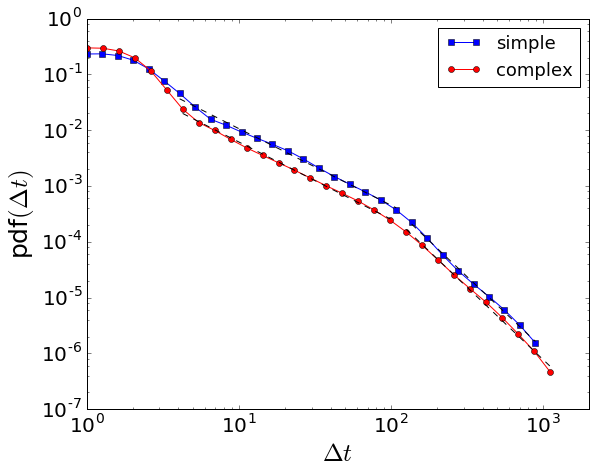

In [1042]:
pl.figure(1,(9,7))
for treatment in allDic.keys():
    dT = np.array(allDic[treatment]['values']['dT'])
    dT = dT[dT>0.2]
    
    fitAK = AK.adaptive_kernel_quantile_pdf_tom(dT,x_or_lenx=np.logspace(0,np.log10(max(dT)),30))
    pl.loglog(fitAK[0],fitAK[1],marker=allDic[treatment]['plot']['marker'],color=allDic[treatment]['plot']['color'],label=treatment)
    
    
    #for threshold in np.arange(100,150,5):
    
    minDT = 4
    threshold = 125
    cond1 = (fitAK[0] > minDT)*(fitAK[0] < threshold)
    cond2 = (fitAK[0] > minDT)*(fitAK[0] >= threshold)
    
    for cond in [cond1,cond2]:
        lx,ly = logify(fitAK[0][cond],fitAK[1][cond])
        fit = S.linregress(lx,ly)
        print fit        
    
        pl.loglog(10**lx,10**(lx*fit[0]+fit[1]),'k--')

    #pl.loglog(x,y,lw=0,marker=allDic[treatment]['plot']['marker'],color=allDic[treatment]['plot']['color'])
    
    
    
pl.xlabel("$\Delta t$")
pl.ylabel("pdf$(\Delta t)$")
pl.xlim(1,2000)
pl.legend(loc=0)
pl.savefig(dir + "Figures/pdf_Dt.eps")

LinregressResult(slope=-1.4024857521661638, intercept=-3.818915158378692, rvalue=-0.9878664783164437, pvalue=5.1809366346001171e-16, stderr=0.051969794223264726)
LinregressResult(slope=-1.4163632547613725, intercept=-3.9996165956019194, rvalue=-0.9977136193980527, pvalue=1.6080715195151292e-22, stderr=0.02261379113348657)


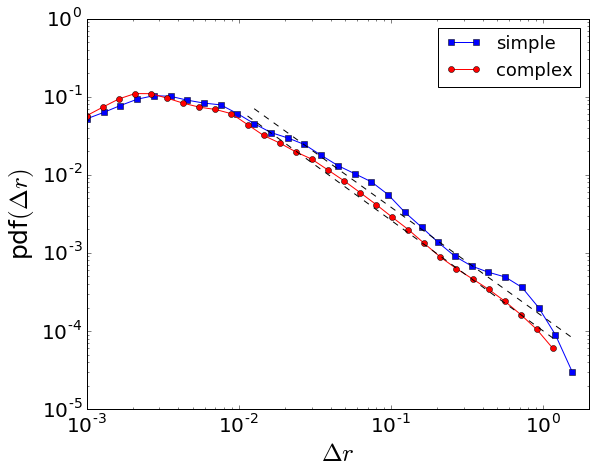

In [1053]:
pl.figure(1,(9,7))
for treatment in allDic.keys():
    dR = np.array(allDic[treatment]['values']['dR'])
    dR = dR[dR>1e-3]
    
    fitAK = AK.adaptive_kernel_quantile_pdf_tom(dR,x_or_lenx=np.logspace(-3,np.log10(1.1*max(dR)),30))
    fitAKx = np.array(fitAK[0])
    fitAKy = np.array(fitAK[1])
    
    fitAKy = fitAKy/np.sum(fitAKy)
    
    pl.loglog(fitAK[0],fitAKy,marker=allDic[treatment]['plot']['marker'],color=allDic[treatment]['plot']['color'],label=treatment)
    
    cond = fitAKx > 0.01
    
    lx,ly = logify(fitAKx[cond],fitAKy[cond])
    fit = S.linregress(lx,ly)
    print fit
    
    pl.loglog(10**lx,10**(lx*fit[0]+fit[1]),'k--')

    
pl.xlabel("$\Delta r$")
pl.ylabel("pdf$(\Delta r)$")
pl.legend(loc=0)
#pl.ylim(ymin=1e-2)
pl.xlim(xmax=2)
pl.savefig(dir + "Figures/PDF_dR.eps")

0.551387181477 0.0322120084592 3855
0.572019846013 0.0344673931129 3367


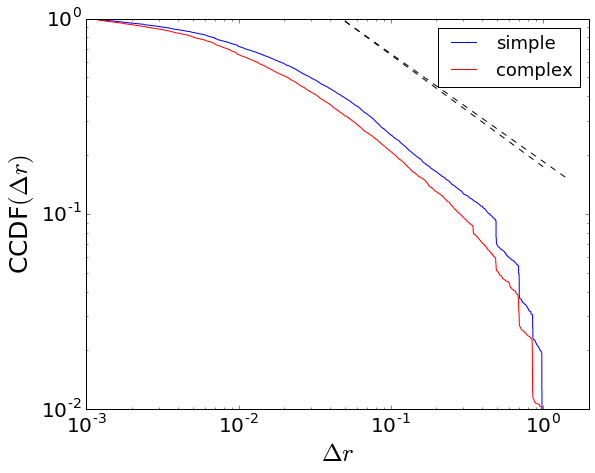

In [1030]:
pl.figure(1,(9,7))
for treatment in allDic.keys():
    dR = np.array(allDic[treatment]['values']['dR'])
    dR = dR[dR>1e-3]
    
    fit = plotPowerLawFit(dR,xmin=0.05,continuousFit=True,addnoise=True,confint=.01,plot=False)
    pl.loglog(fit['x'],fit['y'],'-',color=allDic[treatment]['plot']['color'],label=treatment)
    pl.loglog(fit['xFit'],fit['yFit'],'k--')
    
    
pl.xlabel("$\Delta r$")
pl.ylabel("CCDF$(\Delta r)$")
pl.legend(loc=0)
pl.ylim(ymin=1e-2)
pl.xlim(xmax=2)
pl.savefig(dir + "Figures/CCDF_dR.eps")

0.574502343092 0.0372097048124 2889
0.59282474599 0.0414959193363 2323


(0.01, 1.0)

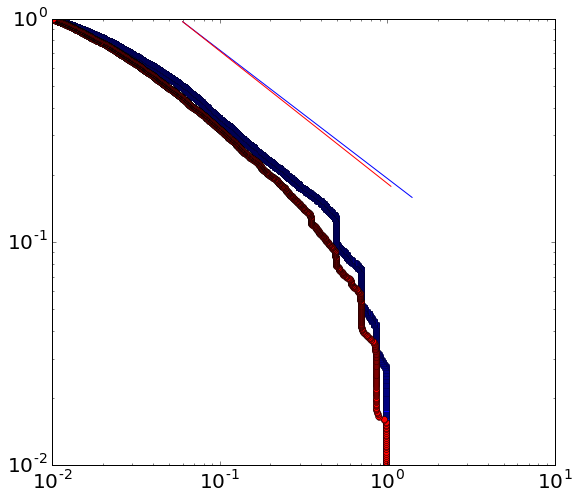

In [785]:
pl.figure(1,(9,8))

for treatment in allDic.keys():
    dR = allDic[treatment]['values']['dR']
    cond = dR > 1e-2

    fit = plotPowerLawFit(dR[cond],xmin=6e-2,continuousFit=True,addnoise=True,confint=.01,plot=False)
    pl.loglog(fit['x'],fit['y'],lw=0,marker=allDic[treatment]['plot']['marker'],color=allDic[treatment]['plot']['color'],label=treatment)
    pl.loglog(fit['xFit'],fit['yFit'],color=allDic[treatment]['plot']['color'])

pl.ylim(ymin=0.01)

scaling:
LinregressResult(slope=-0.1962558256733101, intercept=-0.27366409568889455, rvalue=-0.57357183770796794, pvalue=2.0304219578852826e-05, stderr=0.041325874129880667)
scaling:
LinregressResult(slope=-0.13477387608485453, intercept=-0.18656328616357512, rvalue=-0.49661781875822714, pvalue=0.00033041019235440405, stderr=0.034730327597863805)


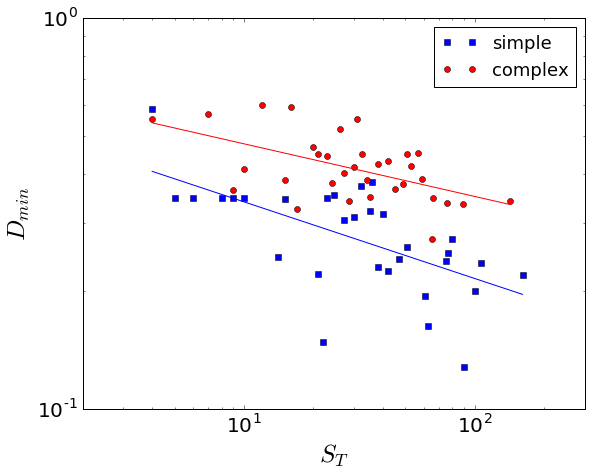

In [924]:
pl.figure(1,(9,7))

for treatment in allDic.keys():
    maxSt = np.array(allDic[treatment]['values']['maxSt'])
    mDst = np.array(allDic[treatment]['values']['minScore'])
    
    #pl.subplot(121)
    #fit = S.linregress(maxSt,mDst)
    #print "linear:\n",fit
    #pl.plot(maxSt,mDst,'o')
    #pl.subplot(122)
    lx,ly = logify(maxSt,mDst)
    B = binning(lx,ly,100,confinter=25)
    scaling = S.linregress(lx,ly)
    print "scaling:\n",scaling

    #pl.loglog(10**lx,10**ly,'.')
    pl.loglog(10**B['bins'],10**B['mean'],marker=allDic[treatment]['plot']['marker'],lw=0,color=allDic[treatment]['plot']['color'],label=treatment)
    pl.loglog(10**B['bins'],10**(B['bins']*scaling[0]+scaling[1]),'-',color=allDic[treatment]['plot']['color'])
    #pl.fill_between(10**B['bins'],10**B['percDown'],10**B['percUp'],color=allDic[treatment]['plot']['color'],alpha = 0.1,lw=0)

pl.xlabel("$S_T$")
pl.ylabel("$D_{min}$")
pl.xlim(2,300)
pl.legend(loc=0)
pl.savefig(dir + "Figures/Dmin_vs_S_T.eps")

1.56117325877 0.0735711892778 739
Re-setting some zeros.
LinregressResult(slope=-2.8699477544671996, intercept=0.54540925577903554, rvalue=-0.99983545446773248, pvalue=4.0610620729558209e-08, stderr=0.026034883665241253)
1.47301939102 0.0813115628182 605
Re-setting some zeros.
LinregressResult(slope=-2.7252865512022386, intercept=0.45936681656986211, rvalue=-0.9995926591724118, pvalue=9.868342903390325e-06, stderr=0.044923979994683783)


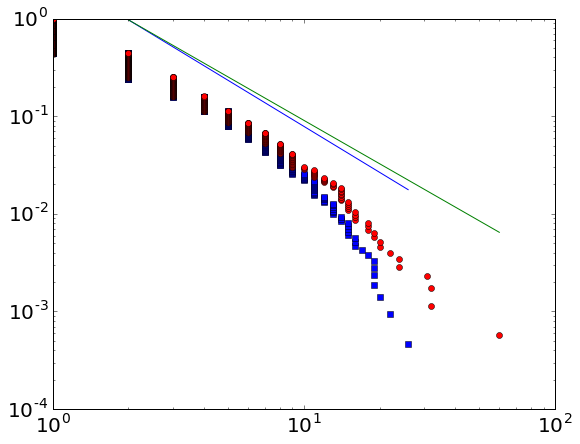

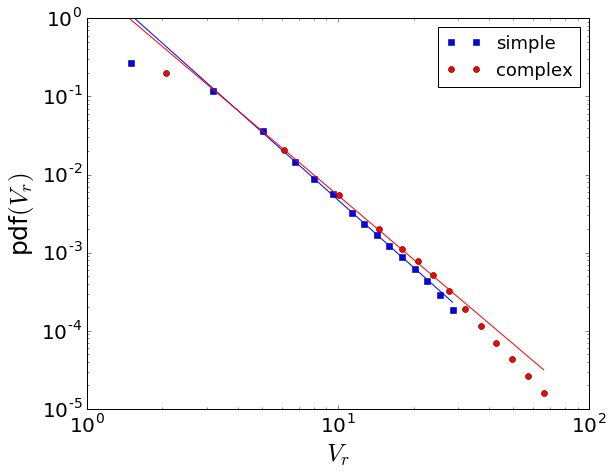

In [1112]:
pl.figure(1,(9,7))
pl.figure(2,(9,7))

for treatment in allDic.keys():
    
    Vr = allDic[treatment]['values']['Vr']
    
    pl.figure(1)
    fit = plotPowerLawFit(Vr,xmin=2,continuousFit=True,addnoise=True,confint=.01,plot=False)
    pl.loglog(fit['x'],fit['y'],lw=0,marker=allDic[treatment]['plot']['marker'],color=allDic[treatment]['plot']['color'],label=treatment)
    pl.loglog(fit['xFit'],fit['yFit'])
    
    pl.figure(2)
    fitAK = AK.adaptive_kernel_quantile_pdf_tom(Vr,x_or_lenx=np.logspace(np.log10(1),np.log10(1.1*max(Vr)),30))
    B = binning(fitAK[0],fitAK[1],20)
    pl.loglog(B['bins'],B['mean'],lw=0,marker=allDic[treatment]['plot']['marker'],color=allDic[treatment]['plot']['color'],label=treatment)
    #pl.loglog(fitAK[0],fitAK[1],lw=0,marker=allDic[treatment]['plot']['marker'],color=allDic[treatment]['plot']['color'],label=treatment)
    
    lx = np.log10(fitAK[0])
    ly = np.log10(fitAK[1])
    lx,ly = logify(fitAK[0],fitAK[1])
    cond = (lx > 1)*(lx < np.log10(20))
    
    fit = S.linregress(lx[cond],ly[cond])
    print fit
    pl.loglog(10**lx,10**(lx*fit[0]+fit[1]),color=allDic[treatment]['plot']['color'])

pl.xlim(0,250)
#pl.figure(1)  
#pl.xlabel("return")
#pl.ylabel("CCDF")
#pl.legend(loc=0)
              
pl.figure(2)
pl.ylim(ymax=1)
pl.xlabel("$V_r$")
pl.ylabel("pdf$(V_r)$")
pl.xlim(xmax=100)
pl.legend(loc=0)
pl.savefig(dir + "Figures/pdf_return.eps")

LinregressResult(slope=0.047073034194218932, intercept=0.19390162550493029, rvalue=0.34683137232174566, pvalue=8.1125576363943073e-204, stderr=0.0014959732060381092)
LinregressResult(slope=0.036254805648394388, intercept=0.2007885438372855, rvalue=0.27653374413572029, pvalue=8.9167710198831189e-121, stderr=0.0015206261902159801)


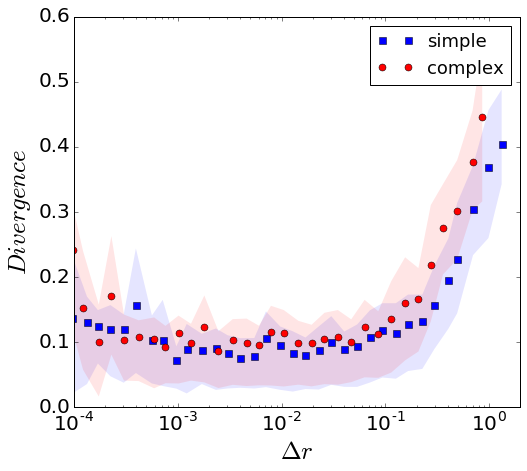

In [706]:
pl.figure(1,(8,7))
for treatment in allDic.keys():
    
    dR = np.array(allDic[treatment]['values']['dR'])
    Divergence = np.array(allDic[treatment]['values']['Divergence'])
    cond = (dR > 1e-7) 
    
    ldR = np.log10(dR[cond])
    Divergence = Divergence[cond]

    fit = S.linregress(ldR,Divergence)
    print fit
    B = binning(ldR,Divergence,50,confinter=25)
    
    #pl.semilogx(10**ldR,Divergence,'.')
    
    pl.semilogx(10**B['bins'],B['mean'],lw=0,ms=7,marker=allDic[treatment]['plot']['marker'],color=allDic[treatment]['plot']['color'],label=treatment)
    #pl.scatter(10**B['bins'],B['mean'],s=B['nPoints'],lw=0,marker=allDic[treatment]['plot']['marker'],color=allDic[treatment]['plot']['color'],label=treatment,alpha=0.5)
    #pl.plot(B['bins'],B['bins']*fit[0]+fit[1],'-',color=allDic[treatment]['plot']['color'])
    pl.fill_between(10**B['bins'],B['percDown'],B['percUp'],color=allDic[treatment]['plot']['color'],alpha = 0.1,lw=0)
    pl.semilogx(10**B['bins'],np.zeros_like(B['bins']),'k-')

pl.figure(1)
pl.xlabel("$\Delta r$")
pl.ylabel("$Divergence$")
pl.ylim(1e-4,0.6)
pl.xlim(1e-4,2)
pl.legend(loc=0)

7297 7297
LinregressResult(slope=0.002571098685638045, intercept=0.0031462736947496586, rvalue=0.033013180571973215, pvalue=0.0049557723236034459, stderr=0.00091473503650678519)
LinregressResult(slope=0.88602199963834705, intercept=-0.83490458398585887, rvalue=0.80152243395830702, pvalue=0.0, stderr=0.010456627404318438)
10951 10951
LinregressResult(slope=0.00092749265381417557, intercept=0.00090817018840382577, rvalue=0.021594625669763959, pvalue=0.073554833017589652, stderr=0.00051825469129374133)
LinregressResult(slope=0.82392705427903257, intercept=-1.1060103391525575, rvalue=0.61272935325134659, pvalue=0.0, stderr=0.017234633677221615)


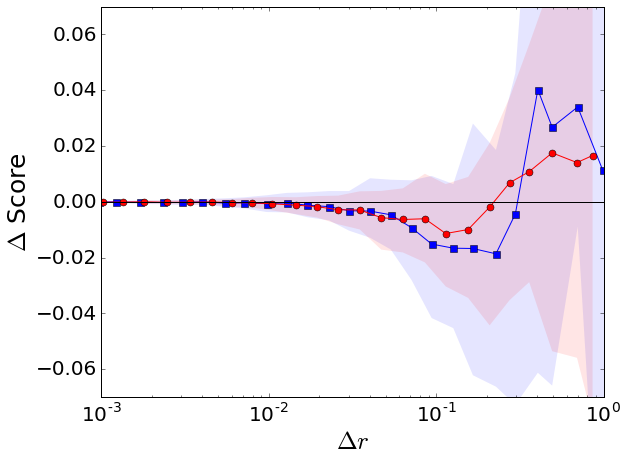

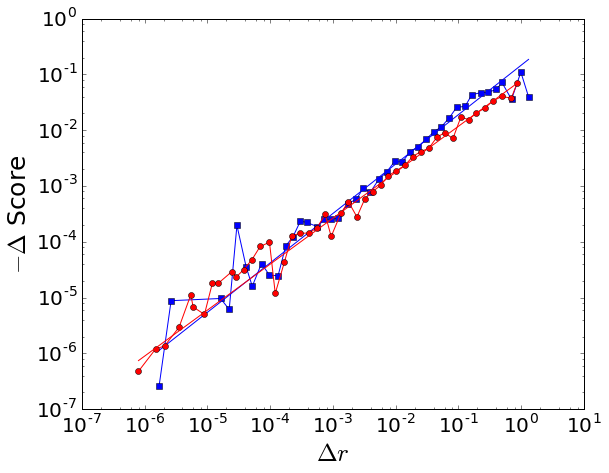

In [957]:
pl.figure(1,(9,7))
pl.figure(2,(9,7))
for treatment in allDic.keys():
    dR = np.array(allDic[treatment]['values']['dR'])
    dScore = np.array(allDic[treatment]['values']['dScore'])
    print len(dR),len(dScore)
    cond = (dR > 1e-7)#*(dScore)
    
    ldR = np.log10(dR[cond])
    dScore = dScore[cond]
    
    
    fit = S.linregress(ldR,dScore)
    print fit
    B = binning(ldR,dScore,50,confinter=25)
    #pl.plot(ldR,dScore,'.')
    
    #pl.plot(10**B['bins'],B['mean'])
    pl.figure(1)
    pl.semilogx(10**B['bins'],B['mean'],ms=7,marker=allDic[treatment]['plot']['marker'],color=allDic[treatment]['plot']['color'],label=treatment)
    #pl.scatter(10**B['bins'],B['mean'],s=B['nPoints'],lw=0,marker=allDic[treatment]['plot']['marker'],color=allDic[treatment]['plot']['color'],label=treatment,alpha=0.5)
    #pl.plot(B['bins'],B['bins']*fit[0]+fit[1],'-',color=allDic[treatment]['plot']['color'])
    pl.fill_between(10**B['bins'],B['percDown'],B['percUp'],color=allDic[treatment]['plot']['color'],alpha = 0.1,lw=0)
    pl.semilogx(10**B['bins'],np.zeros_like(B['bins']),'k-')
    
    
    pl.figure(2)
    cond2 = (dScore < 0) 
    ldScore = np.log10(-dScore[cond2])
    B = binning(ldR[cond2],ldScore,50,confinter=25)
    fit2 = S.linregress(ldR[cond2],ldScore)
    print fit2
    pl.loglog(10**B['bins'],10**B['mean'],marker=allDic[treatment]['plot']['marker'],color=allDic[treatment]['plot']['color'],label=treatment)
    pl.loglog(10**B['bins'],10**(B['bins']*fit2[0]+fit2[1]),'-',color=allDic[treatment]['plot']['color'])
    pl.fill_between(B['bins'],B['percDown'],B['percUp'],color=allDic[treatment]['plot']['color'],alpha = 0.1,lw=0)
    
    #fit = S.linregress(ldR[cond],dScore[cond])
    #print fit
    #B = binning(dR[cond],dScore[cond],20,confinter=10)
    #pl.semilogx(dR[cond],dScore[cond],'.')
    #pl.plot(B['bins'],B['mean'],'o')
    #pl.plot(B['bins'],B['mean'],lw=0,marker=allDic[treatment]['plot']['marker'],color=allDic[treatment]['plot']['color'],label=treatment)
    #pl.plot(B['bins'],B['bins']*fit[0]+fit[1],'-',color=allDic[treatment]['plot']['color'])
    #

    #pl.figure(2)
    #pl.semilogx(10**B['bins'],B['nPoints'],marker=allDic[treatment]['plot']['marker'],color=allDic[treatment]['plot']['color'],label=treatment)

#pl.xlim(5e-6,3)

pl.figure(1)
pl.xlabel("$\Delta r$")
pl.ylabel("$\Delta$ Score")
pl.ylim(-0.07,0.07)
pl.xlim(1e-3,1)
pl.savefig(dir + "Figures/dScore_vs_Dr.eps")
#pl.legend(loc=0)

pl.figure(2)
pl.xlabel("$\Delta r$")
pl.ylabel("$- \Delta$ Score")
pl.savefig(dir + "Figures/scaling_dScore_vs_Dr.eps")


LinregressResult(slope=0.10833489146357332, intercept=0.57090438649651309, rvalue=0.11836615922220907, pvalue=1.8331476877528184e-18, stderr=0.012312844135823278)
LinregressResult(slope=0.12952342207433828, intercept=0.62486522993833438, rvalue=0.1461743262565616, pvalue=2.9834747132017569e-27, stderr=0.011913188855630813)


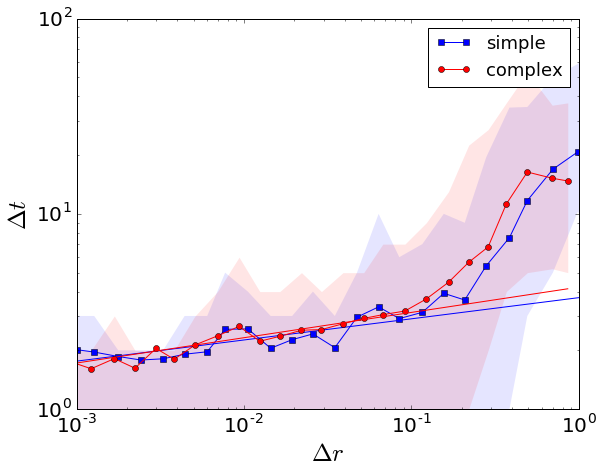

In [939]:
pl.figure(1,(9,7))
for treatment in allDic.keys():
    dR = allDic[treatment]['values']['dR']
    dT = allDic[treatment]['values']['dT']
    cond = (dR > 10**-4)*(dT >0)
    ldR = np.log10(dR[cond])
    ldT = np.log10(dT[cond])
    
    B = binning(ldR,ldT,30,confinter=25)

    cond = ldR < np.log10(0.1)

    scaling = S.linregress(ldR[cond],ldT[cond])
    print scaling

    #pl.loglog(10**ldR,10**ldT,'.')
    pl.loglog(10**B['bins'],10**B['mean'],marker=allDic[treatment]['plot']['marker'],color=allDic[treatment]['plot']['color'],label=treatment)
    pl.loglog(10**B['bins'],10**(B['bins']*scaling[0]+scaling[1]),'-',color=allDic[treatment]['plot']['color'])
    pl.fill_between(10**B['bins'],10**B['percDown'],10**B['percUp'],color=allDic[treatment]['plot']['color'],alpha = 0.1,lw=0)
    
pl.xlabel("$\Delta r$")
pl.ylabel("$\Delta t$")
pl.xlim(1e-3,1)
pl.legend(loc=0)

pl.savefig(dir + "Figures/Dt_vs_Dr.eps")

2130 2130
LinregressResult(slope=0.00076627915925949689, intercept=0.13044583686790978, rvalue=0.88195158725614842, pvalue=0.0, stderr=8.8775015265666955e-06)
1743 1743
LinregressResult(slope=0.00076557116243516389, intercept=0.16042274674382317, rvalue=0.86302135122647528, pvalue=0.0, stderr=1.0739894003416059e-05)


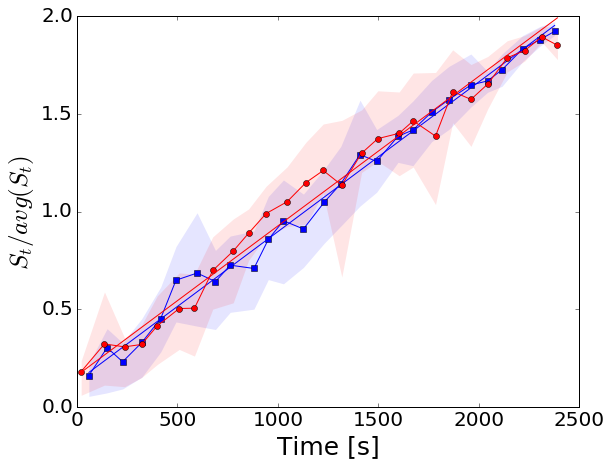

In [1057]:
pl.figure(1,(9,7))

for treatment in allDic.keys():
    T = allDic[treatment]['values']['Tnew']
    St = allDic[treatment]['values']['St']
    
    print len(T),len(St)
    B = binning(T,St,30,confinter=25)
    fit = S.linregress(T,St)
    print fit
    
    pl.plot(B['bins'],B['mean'],lw=1,marker=allDic[treatment]['plot']['marker'],color=allDic[treatment]['plot']['color'],label=treatment)
    pl.plot(B['bins'],B['bins']*fit[0]+fit[1],'-',color=allDic[treatment]['plot']['color'])
    pl.fill_between(B['bins'],B['percDown'],B['percUp'],color=allDic[treatment]['plot']['color'],alpha = 0.1,lw=0)
    
pl.xlabel("Time [s]")
pl.ylabel("$S_t/avg(S_t)$")
pl.savefig(dir + "Figures/explore_S.eps")
#pl.subplot(122)
#lx,ly = logify(T,St)
#cond = lx > np.log10(200)

#scaling = S.linregress(lx[cond],ly[cond])
#B = binning(lx[cond],ly[cond],30,confinter=25)
#print scaling
#pl.loglog(10**lx[cond],10**ly[cond],'.')
#pl.loglog(10**B['bins'],10**B['mean'],'ro')
#pl.fill_between(10**B['bins'],10**B['percDown'],10**B['percUp'],color='r',alpha = 0.1,lw=0)

In [406]:
T = []
maxSt = []
mDst = []
for key in dicParticipants.keys():
    if not dicParticipants[key]['treatment'] == treatment : continue
    k = 0
    ddst = []
    mdst = []
    t,s = np.array(zip(*dicParticipants[key]['visitations']['explore_new']))

    for i,ix in enumerate(dic[key]['index'][:-1]):
        if ix in t:
            k += 1
            #print k,i,dic[key]['index'][i],dic[key]['dstTruth']['sqrt'][i]
            ddst.append(np.diff(dic[key]['dstTruth']['sqrt'])[i])
    mdst = np.min(dic[key]['dstTruth']['sqrt'])
    test = np.mean(ddst)
    T = np.append(T,test)
    maxSt = np.append(maxSt,k)
    mDst = np.append(mDst,mdst)
    #print test,len(ddst),mdst

$S(t) \sim t^{\mu}$ with $\mu  \approx 0.7$

$D(t) \sim t^{\nu}$ with $\nu \approx 0.2$

$\langle D \rangle \sim S^{-.2}$


$\rightarrow D(S)$ is needed

$D(S)$ predicted:

$D(S) \sim S^{\nu/\mu}$ with $\nu/\mu = 0.2/0.7 \approx 0.29 $

1.55393875243 0.0742781352708 725
1.47288013675 0.0811774958468 607


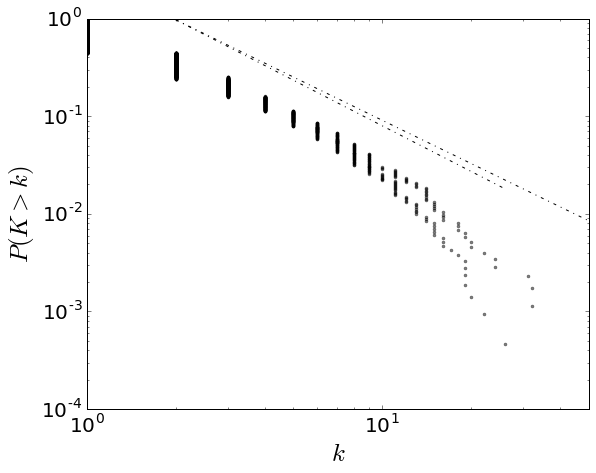

In [1070]:
pl.figure(1,(9,7))
for treatment in allDic.keys():
    VisitationFreq = allDic[treatment]['values']['Vr']
    fitdic = plotPowerLawFit(VisitationFreq,xmin=2,continuousFit=True,addnoise=True,confint=.01,plot=True)
pl.xlim(xmax=50)
pl.xlabel("$k$")
pl.ylabel("$P(K > k)$")
pl.savefig(dir + "Figures/CCDF_ReturnFreq_%s.eps"%treatment)

In [167]:
f = np.array([])
PI = np.array([])

for v,vx in enumerate(np.sort(np.unique(VisitationFreq))):
    f = np.append(f,len(np.argwhere(VisitationFreq==vx)))
    PI = np.append(PI,len(np.argwhere(VisitationFreq >= vx)))
        
f = np.array(f)/np.sum(f)
PI = np.array(PI)/np.sum(PI)

LinregressResult(slope=-2.6003517599149029, intercept=-0.18394154674697027, rvalue=-0.95940213885331826, pvalue=2.187688188373332e-07, stderr=0.23048806482682327)


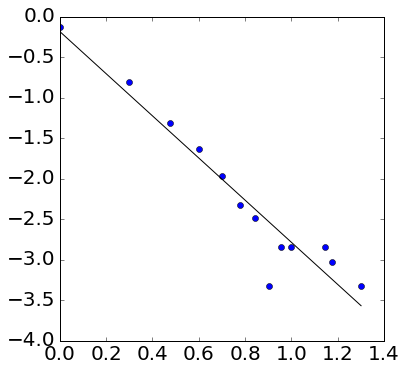

In [168]:
x = np.sort(np.unique(VisitationFreq))
#pl.loglog(x,PI,'o')
cond = (x>0)*(f>0)
lx = np.log10(x[cond])
ly = np.log10(f[cond])
fit = S.linregress(lx,ly)
print fit
pl.plot(lx,ly,'o')
pl.plot(lx,lx*fit[0]+fit[1],'k-')

LinregressResult(slope=-2.4998871185124547, intercept=-0.05065456565748816, rvalue=-0.99469246449664483, pvalue=3.2327333247795099e-12, stderr=0.077968585568863186)


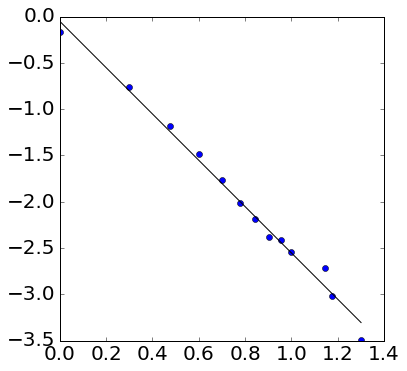

In [169]:
x = np.sort(np.unique(VisitationFreq))
#pl.loglog(x,PI,'o')
cond = (x>0)*(PI>0)
lx = np.log10(x[cond])
ly = np.log10(PI[cond])
fit = S.linregress(lx,ly)
print fit
pl.plot(lx,ly,'o')
pl.plot(lx,lx*fit[0]+fit[1],'k-')

LinregressResult(slope=0.89192218868455653, intercept=-0.028039513332677624, rvalue=0.96189311391323451, pvalue=1.551774200871593e-07, stderr=0.076443966272041558)


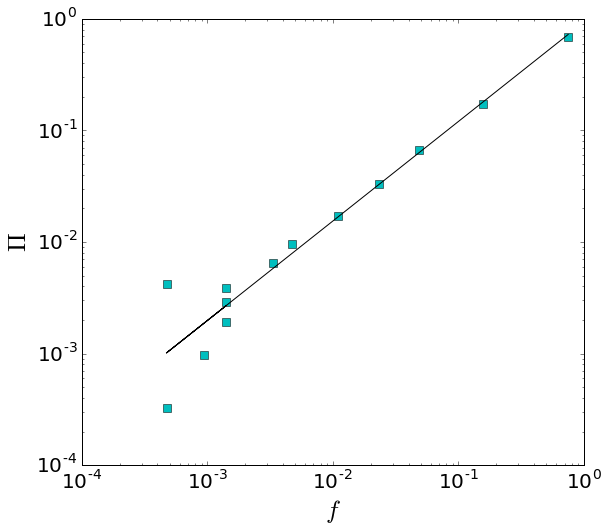

In [216]:
cond = (f > 0)*(PI > 0)
lx = np.log10(f[cond])
ly = np.log10(PI[cond])
fit = S.linregress(lx,ly)
print fit
pl.figure(1,(9,8))
pl.loglog(f,PI,'cs',ms=8)
pl.loglog(10**(lx),10**(lx*fit[0] + fit[1]),'k-')
pl.xlabel("$f$")
pl.ylabel("$\Pi$")
pl.savefig(dir + "Figures/PI_f_%s.eps"%treatment)

#pl.xlim(xmax=2500)

LinregressResult(slope=0.35127341443169302, intercept=-1.584578000153174, rvalue=0.40817766979196246, pvalue=1.0759142878602852e-284, stderr=0.0093015192245459559)


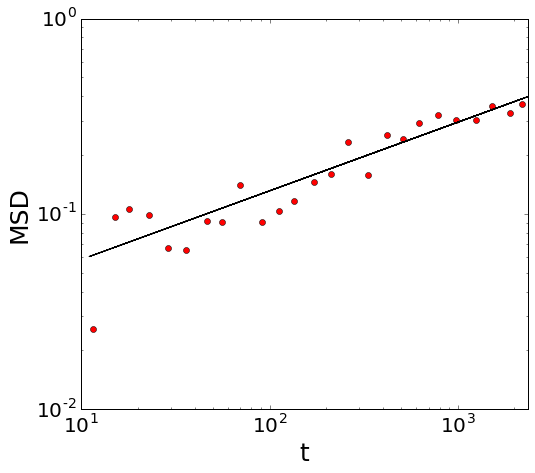

In [41]:
x = indexMSD
y = MSD

cond = (x > 10)*(y > 0.01)
lx = np.log10(x[cond])
ly = np.log10(y[cond])

B = binning(lx,ly,30)

fit = S.linregress(lx,ly)
print fit

pl.figure(1,(8,7))
#pl.loglog(10**lx,10**ly,'.')
pl.loglog(10**B['bins'],10**B['mean'],'ro')
pl.loglog(10**lx,10**(lx*fit[0]+ fit[1]),'k-')
pl.xlabel("t")
pl.ylabel("MSD")
#pl.ylim(ymin=10**-5)
pl.xlim(xmax = max(x))
pl.savefig(dir + "Figures/MSD_%s.eps"%treatment)

#pl.figure(2)
#pl.plot(x,y,'.')
#B = binning(x[cond],y[cond],30)
#pl.loglog(B['bins'],B['mean'],'ro')
#fit = S.linregress(x[cond],y[cond])
#pl.ylim(ymin=10**-2)
#print fit
#pl.plot(x,(x*fit[0]+ fit[1]),'k-')

LinregressResult(slope=0.91442330325720167, intercept=-1.3697495168113734, rvalue=0.96278098210545093, pvalue=7.8939657163864959e-13, stderr=0.057401489174602117)


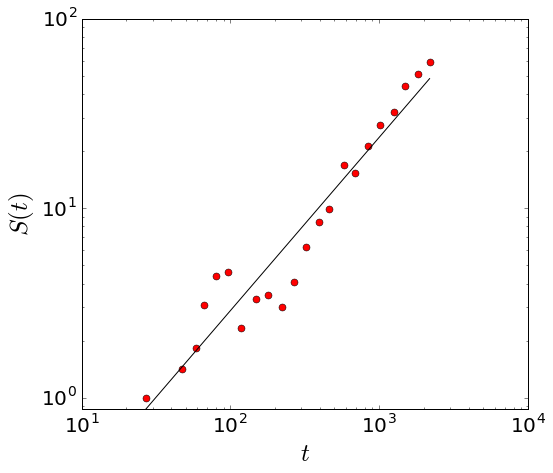

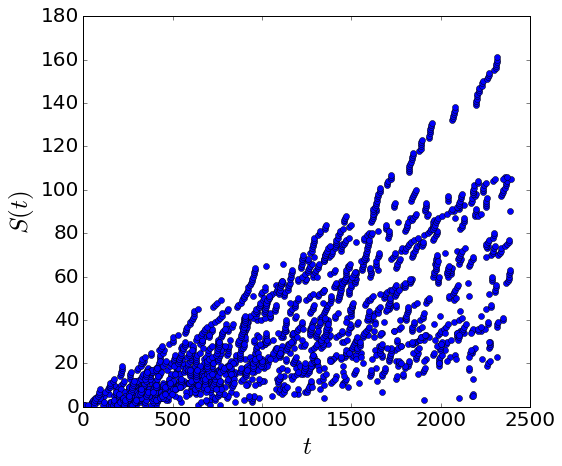

In [89]:
pl.figure(1,(8,7))
x,y = np.array(zip(*SiteExpl))

cond = (x > 10)*(y > 0)#*(x < 10**2.5)
lx = np.log10(x[cond])
ly = np.log10(y[cond])
#pl.plot(lx,ly,'.')
B = binning(lx,ly,30)
pl.loglog(10**B['bins'],10**B['mean'],'ro',ms=7)
fit = S.linregress(B['bins'],B['mean'])
print fit
pl.plot(10**B['bins'],10**(B['bins']*fit[0]+ fit[1]),'k-')
pl.xlabel("$t$")
pl.ylabel("$S(t)$")
pl.ylim(0,100)
#pl.xlim(0,500)
pl.savefig(dir + "Figures/scaling_S(t)_%s.eps"%treatment)


pl.figure(2,(8,7))
#fit = S.linregress(x,y)
#print fit
pl.plot(x,y,'o')
#pl.plot(x,x*fit[0] + fit[1],'k-')
pl.xlabel("$t$")
pl.ylabel("$S(t)$")

In [ ]:
d = len(V[0])
test = np.array(V)
bins = np.arange(0,1.01,0.3)
bins[-1] += 0.001
H,edges = np.histogramdd(test,bins = [bins]*d,range=[[0,1]]*d)

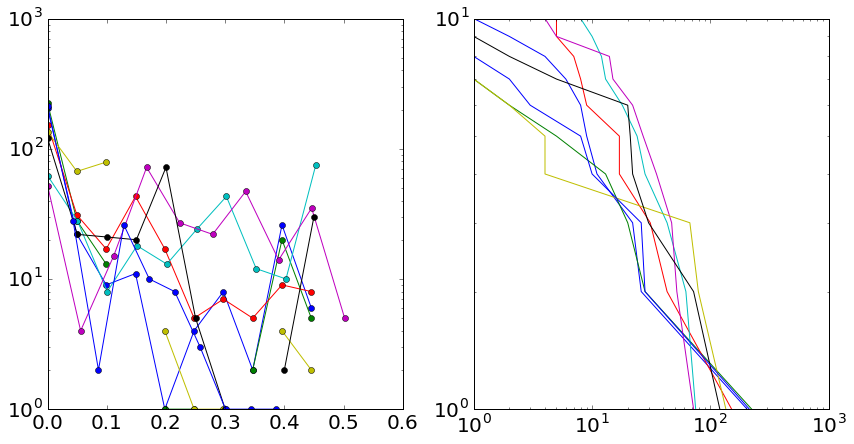

In [919]:
H = np.zeros([test.shape[1],len(bins)-1])

for i in range(test.shape[1]):
    h = np.histogram(test[:,i],bins=10)
    H[i] = h[0]


    pl.figure(1,(14,7))
    pl.subplot(121)
    x = h[1][:-1]
    y = h[0]
    #pl.bar(x,y,width=bins[1])
    pl.semilogy(x,y,'o-')
    pl.subplot(122)
    #fitdic = plotPowerLawFit(y,xmin=10,continuousFit=True,addnoise=True,confint=.01,plot=True)
    x,y = rankorder(y)
    pl.loglog(x,y,'-')

0.612097763732 0.0314502731861 4044


/Users/maithoma/work/github/bayesLearn/scripts/bayesLib.py:148: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  m = np.zeros([numiter,nPoints])


1.40712473505 0.0257328692335 0.115224601493


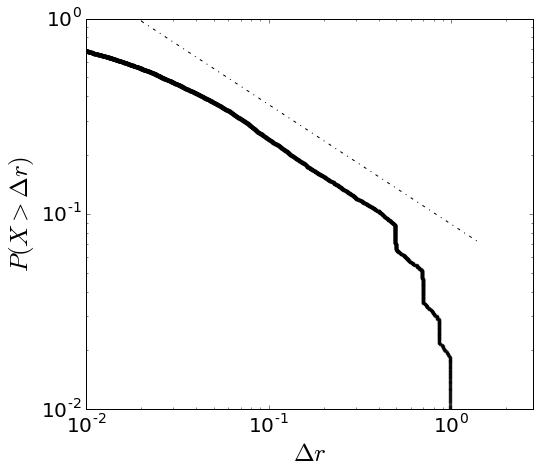

In [16]:
pl.figure(1,(8,7))
fitdic = plotPowerLawFit(Displacement,xmin=0.02,continuousFit=True,addnoise=False,confint=.01,plot=True)
pl.xlim(0.01,2.8)
pl.ylim(ymin=0.01)

pl.xlabel("$\Delta r$")
pl.ylabel("$P(X > \Delta r)$")
pl.savefig(dir + "Figures/CCDF_Displacement_%s.eps"%treatment)

print max(Displacement),np.median(Displacement),np.mean(Displacement)

LinregressResult(slope=0.0040282163703809363, intercept=-0.0017180322912125436, rvalue=0.058388041707456824, pvalue=9.6766609334962527e-10, stderr=0.0006582033637402095)


(1, 1000.0)

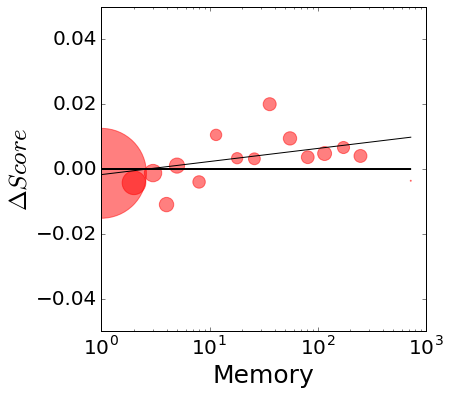

In [86]:
fit = S.linregress(np.log10(stepDistance),dScore)
print fit
B = binning(np.log10(stepDistance),dScore,20,confinter=10)
#fit = S.linregress(B['bins'],B['mean'])
#print fit
pl.scatter(10**B['bins'],B['mean'],s=B['nPoints'],color="red",alpha=0.5)
pl.plot(10**B['bins'],(B['bins']*fit[0] + fit[1]),'k-')
#pl.semilogx(10**B['bins'],B['percUp'],'r-')
#pl.semilogx(10**B['bins'],B['percDown'],'r-')
#pl.semilogx(10**B['bins'],B['percUp'] + B['percDown'],'m-')
xZero = stepDistance
yZero = np.zeros_like(xZero)

pl.semilogx(xZero,yZero,'k-')
pl.xlabel("Memory")
pl.ylabel("$\Delta Score$")
pl.ylim(-0.05,0.05)
pl.xlim(xmin=1)

LinregressResult(slope=0.7628324931385787, intercept=0.21186111681574021, rvalue=0.54289782677657217, pvalue=6.6990991066866575e-05, stderr=0.17398323085287118)


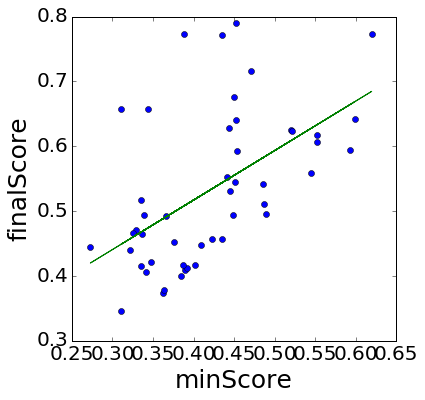

In [174]:
fit = S.linregress(minScore,finalScore)
print fit
pl.plot(minScore,finalScore,'o')
pl.plot(minScore,minScore*fit[0] + fit[1])
pl.xlabel("minScore")
pl.ylabel("finalScore")

LinregressResult(slope=-1.8361114094245579, intercept=0.97474167336096718, rvalue=-0.26374649791535121, pvalue=0.11472253013978305, stderr=1.1350682472338098)


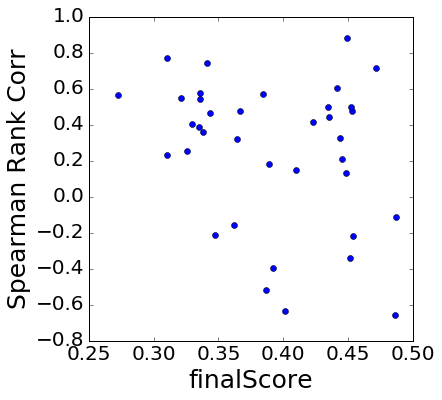

In [204]:
cond = (p_corr < 0.1)*(minScore < 0.5)
#pl.plot(finalScore[cond],correlation[cond],'o')
fit = S.linregress(minScore[cond],correlation[cond])
print fit
pl.plot(minScore[cond],correlation[cond],'o')
pl.xlabel("finalScore")
pl.ylabel("Spearman Rank Corr")


SpearmanrResult(correlation=0.14282396838863301, pvalue=5.3121917614717494e-51)


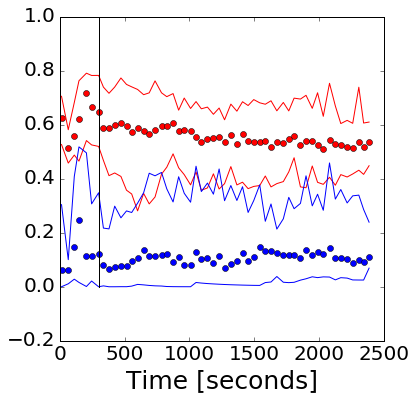

In [540]:
B = binning(I,Score,60,confinter=5)

pl.plot(B['bins'],B['mean'],'ro')
pl.plot(B['bins'],B['percUp'],'r-')
pl.plot(B['bins'],B['percDown'],'r-')

B = binning(I,Divergence,60,confinter=5)

pl.plot(B['bins'],B['mean'],'bo')
pl.plot(B['bins'],B['percUp'],'b-')
pl.plot(B['bins'],B['percDown'],'b-')
yStart = np.linspace(0,1,10)
xStart = np.zeros_like(yStart) + 60*5
pl.plot(xStart,yStart,'k-')
pl.xlabel("Time [seconds]")

pl.savefig(dir + "Figures/decay_score_divergence_%s_linlin.eps"%treatment)

print S.spearmanr(Score,Divergence)

LinregressResult(slope=0.031782403037222191, intercept=-0.0038694780911102426, rvalue=0.10965785559889943, pvalue=1.1915380156715555e-30, stderr=0.0027531683326736094)


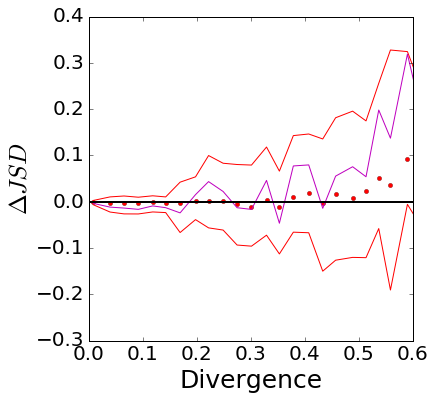

In [544]:
B = binning(Divergence,dScore,30,confinter=95)
#pl.plot(Divergence,dScore,'.',alpha=0.2)
fit = S.linregress(Divergence,dScore)
print fit
pl.scatter(B['bins'],B['mean'],color='r',marker='o',linewidths=0.2,edgecolors="black")
pl.plot(B['bins'],B['percUp'],'r-')
pl.plot(B['bins'],B['percDown'],'r-')

pl.plot(B['bins'],B['percUp'] + B['percDown'],'m-')

#pl.plot(Divergence,Divergence*fit[0]+fit[1],'k-')
pl.plot(Divergence,np.zeros_like(Divergence),'k-')
pl.xlabel("Divergence")
pl.ylabel("$\Delta JSD$")
pl.xlim(0,0.6)
#pl.ylim(-0.05,0.05)
pl.savefig(dir + "Figures/delta_JSD_vs_divergence_%s.eps"%treatment)

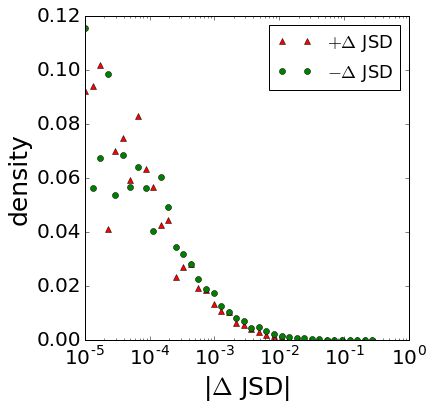

In [617]:
cond = c0*(dScore > 10**-5)
H = np.histogram(dScore[cond],bins = bins,density=True)
x = np.array(H[1][:-1])
y  = np.array(H[0]/float(np.sum(H[0])))

pl.semilogx(x,y,'r^',label="$+\Delta$ JSD")

cond = c0*(dScore < 10**-5)
H = np.histogram(-dScore[cond],bins = bins,density=True)
x = np.array(H[1][:-1])
y  = np.array(H[0]/float(np.sum(H[0])))
pl.semilogx(x,y,'go',label="$-\Delta$ JSD")

pl.ylabel("density")
pl.xlabel("|$\Delta$ JSD|")
pl.legend(loc=0)
pl.savefig(dir + "Figures/density_divergence_%s_loglin.eps"%treatment)

LinregressResult(slope=0.10309943598348446, intercept=-0.0001064882928918944, rvalue=0.22589099479207095, pvalue=1.0103982046637297e-126, stderr=0.0042491017484166628)
-0.00368494645396 -0.000486404193924
-0.000261280858005 0.0
0.0710791089539 0.0324413819599 

LinregressResult(slope=0.28627611014275517, intercept=-0.00083333504059710363, rvalue=0.22985688296583195, pvalue=7.0529078674636466e-126, stderr=0.011832888308810059)


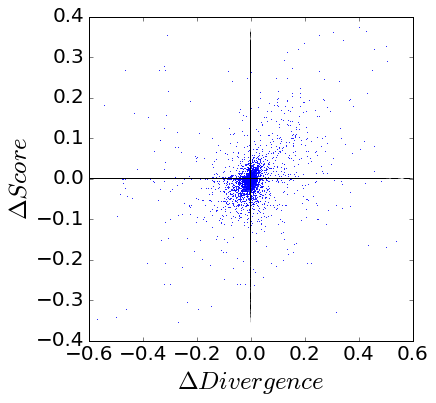

In [547]:
pl.plot(dDivergence,dScore,'.',alpha=1,ms=1)
B = binning(dDivergence,dScore,30,confinter=25)
#pl.plot(B['bins'],B['mean'],'ro')
#pl.plot(B['bins'],B['percUp'],'r-')
#pl.plot(B['bins'],B['percDown'],'r-')
fit = S.linregress(dDivergence,dScore)
print fit
#pl.plot(dDivergence,dDivergence*fit[0]+fit[1],'k-')
pl.plot(dDivergence,np.zeros_like(Divergence),'k--',lw=0.2)
pl.plot(np.zeros_like(dScore),dScore,'k--',lw=0.2)
pl.xlabel("$\Delta Divergence$")
pl.ylabel("$\Delta Score$")
pl.xlim(-0.6,0.6)
pl.ylim(-0.4,0.4)

print np.mean(dDivergence),np.mean(dScore)
print np.median(dDivergence),np.median(dScore)
print np.std(dDivergence),np.std(dScore),"\n"
cond = (dDivergence < 0.1)*(dDivergence > -0.1)
fit = S.linregress(dDivergence[cond],dScore[cond])
print fit
#pl.plot(dDivergence,dDivergence*fit[0]+fit[1],'y-')
pl.savefig(dir + "Figures/delta_score_vs_delta_divergence_%s.eps"%treatment)

### Distribution of JS distance Jump Sizes


simple treatment
0.0
[ 0.  0.]
[ 0.  0.]
[-0.02938281  0.01412159]
negative JS distance: 
LinregressResult(slope=-1.1376997680202301, intercept=-5.4619579503431597, rvalue=-0.90394660040574659, pvalue=1.4636579928606038e-37, stderr=0.054649070370008136)
positive JS distance: 
LinregressResult(slope=-1.5464668071594736, intercept=-6.2838712283635498, rvalue=-0.94592686007109361, pvalue=9.4823052244586086e-48, stderr=0.054698216933635573)

complex treatment
0.0
[ 0.  0.]
[ 0.  0.]
[-0.0143648   0.00691525]
negative JS distance: 
LinregressResult(slope=-1.2335044852597559, intercept=-5.8928327001812084, rvalue=-0.9275785664386339, pvalue=2.7225957855814992e-58, stderr=0.043245673537344563)
positive JS distance: 
LinregressResult(slope=-1.5030644976529661, intercept=-6.4287155410938226, rvalue=-0.93065306075983179, pvalue=1.5162505229956753e-55, stderr=0.053284760589504453)


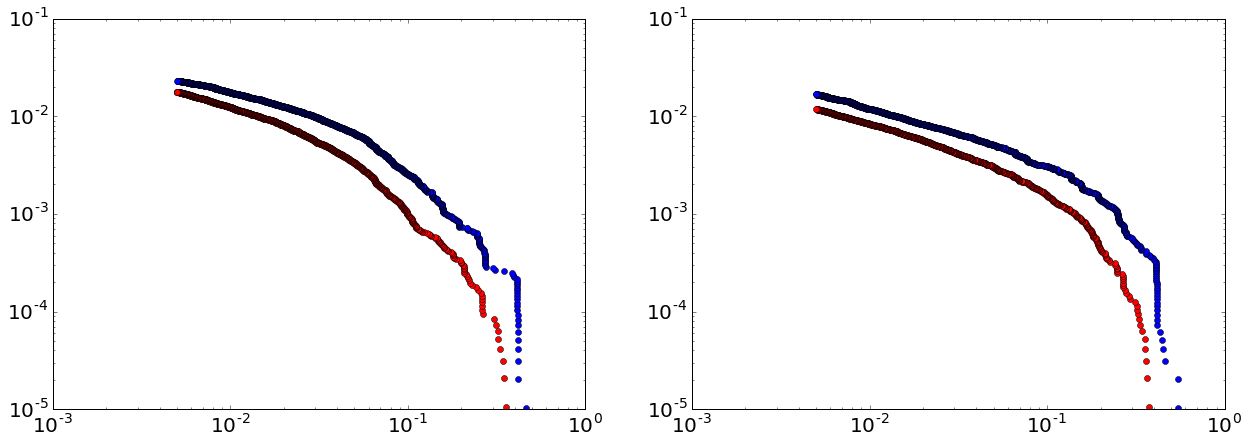

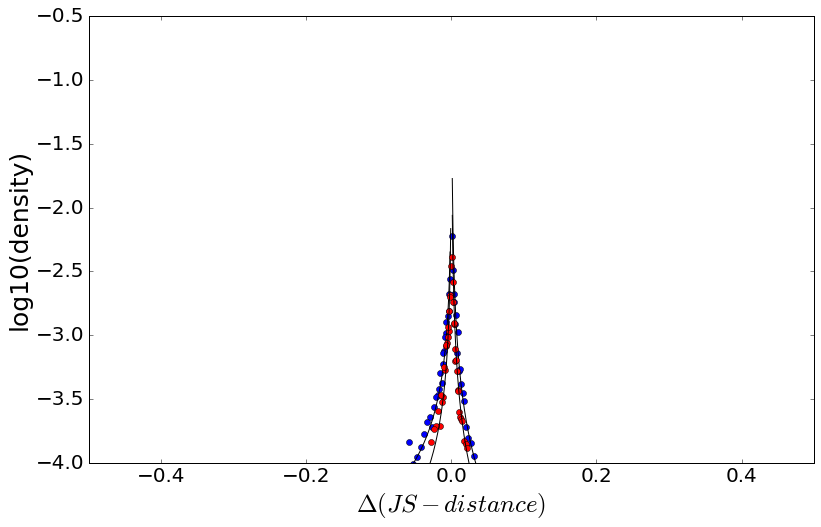

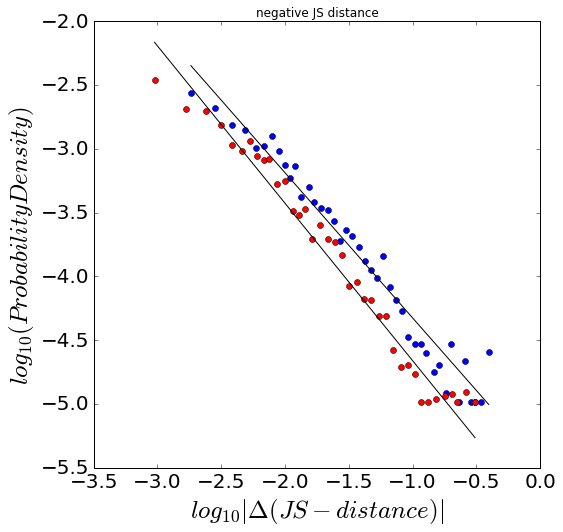

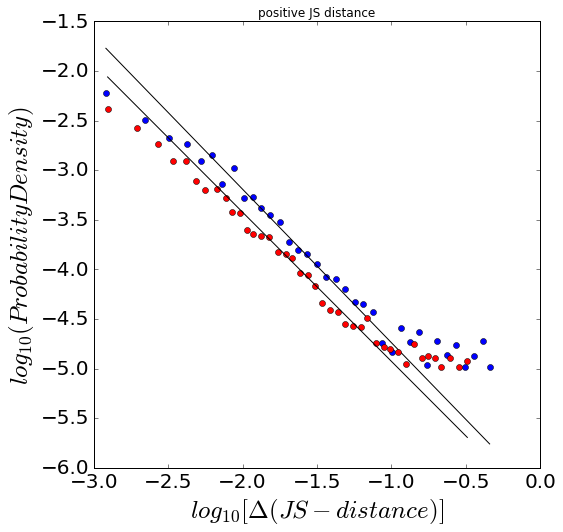

In [227]:
numbins = 50
#pl.figure(1,(9,7))
color = ["blue","red"]
for k,kx  in enumerate([simple_distances,complex_distances][:]):
    
    if k==0:
        print "\nsimple treatment"
    elif k == 1:
        print "\ncomplex treatment"
 

    array = np.array(zip(*np.array(kx)))
    
    deltaJSd = [] 
    for i,ix in enumerate(array):
        cond = np.logical_not(np.isnan(ix))
        
        if not len(ix[cond]):
            continue
            
        y = np.diff(ix[cond])[:]
        deltaJSd = np.append(deltaJSd,y)
    
    
    #cond = (deltaJSd < 0)*(deltaJSd >= -0.01)
    #deltaJSd[cond] = 0.00
    
    #cond = (deltaJSd > 0)*(deltaJSd <= 0.01)
    #deltaJSd[cond] = 0.00
    
    pl.figure(1,(21,7))

    pl.subplot(121)
    x,y = rankorder(-deltaJSd)
    cond = x > 0.005
    pl.loglog(x[cond],y[cond]/float(y[-1]),'o',color=color[k])
    
    pl.subplot(122)
    x,y = rankorder(deltaJSd)
    cond = x > 0.005
    pl.loglog(x[cond],y[cond]/float(y[-1]),'o',color=color[k])
    

    
    
    
    pl.figure(2,(13,8))
    pl.xlabel("$\Delta(JS-distance)$")
    pl.ylabel("log10(density)")
    pl.xlim(-0.5,0.5)
    pl.ylim(-4,-0.5)
    
    
    H = np.histogram(deltaJSd,bins=1000)
    x = H[1][1:]
    y = H[0]/float(np.sum(H[0]))
    
    print np.median(deltaJSd)
    print np.percentile(deltaJSd,(25,75))
    print np.percentile(deltaJSd,(5,95))
    print np.percentile(deltaJSd,(1,99))
    
    # negative JS distance
    cond = (x < 0)*(y > 0)
    lx = np.log10(-x[cond])
    ly = np.log10(y[cond])
    condFit = (lx > -4.5)*(lx < -1.)
    #condFit = (lx > -3.5)*(lx < -2)
    fit = S.linregress(lx[condFit],ly[condFit])
    print "negative JS distance: \n" , fit
    B = binning(lx,ly,numbins)
    #pl.plot(x[cond],ly,'o',color=color[k])
    pl.plot(-10**B['bins'],B['mean'],'o',color=color[k])
    
    #pl.plot(-10**B['bins'],B['percUp'],'-',color=color[k])
    #pl.plot(-10**B['bins'],B['percDown'],'-',color=color[k])
    
    pl.plot(-10**B['bins'],B['bins']*fit[0]+fit[1],'k-')

    
    pl.figure(3,(8,8)) ## loglog panel negative JS distance
    pl.title("negative JS distance")
    #pl.plot(lx,ly,'k.',color=color[k])
    pl.plot(B['bins'],B['mean'],'o',color=color[k])    
    pl.plot(B['bins'],B['bins']*fit[0]+fit[1],'k-')
    pl.xlabel("$log_{10}|\Delta(JS-distance)|$")
    
    pl.ylabel("$log_{10}(Probability Density)$")

    
    # positive JS distance
    pl.figure(2)
    cond = (x > 0)*(y > 0)
    lx = np.log10(x[cond])
    ly = np.log10(y[cond])
    condFit = (lx > -4.5)*(lx < -1.)
    #condFit = (lx > -3.5)*(lx < -2)
    fit = S.linregress(lx[condFit],ly[condFit])
    
    print "positive JS distance: \n" , fit
    B = binning(lx,ly,numbins)
    #pl.plot(x[cond],ly,'o',color=color[k])
    pl.plot(10**B['bins'],B['mean'],'o',color=color[k])
    
    #pl.plot(10**B['bins'],B['percUp'],'-',color=color[k])
    #pl.plot(10**B['bins'],B['percDown'],'-',color=color[k])
    
    pl.plot(10**B['bins'],B['bins']*fit[0]+fit[1],'k-')
    
    
    pl.figure(4,(8,8)) ## loglog panel positive JS distance
    pl.title("positive JS distance")
    pl.plot(B['bins'],B['mean'],'o',color=color[k])
    pl.plot(B['bins'],B['bins']*fit[0]+fit[1],'k-')
    pl.xlabel("$log_{10}[\Delta(JS-distance)]$")
    pl.ylabel("$log_{10}(ProbabilityDensity)$")
    

pl.figure(2)
pl.savefig(dir + "Figures/pdfJSD.eps")
pl.figure(3)
pl.savefig(dir + "Figures/pdfJSD_loglog_negative.eps")

pl.figure(4)
pl.savefig(dir + "Figures/pdfJSD_loglog_positive.eps")

### Exploration versus Performance

In [ ]:
### Not to be used anymore

digits = 1
I = []
INDEX = []
steps = []
dDsquared = []
dDiversity = []
minJSD = []
slope = []
dScore = []
Score = []
Divergence = []
dDivergence = []

sqrtDistance = []
jsdDistance = []

stepDistance = []

plot = False

correlation = []
p_corr = []
minScore = []
iMinScore = []
finalScore = []
meanScore = []

iTargetReached = []

Displacement = []

SiteExpl = []
FirstVisit = []
VisitationFreq = []
MSD = []
indexMSD = []

for k,key in enumerate(treatment_dic.keys()[:]):
    V = []
    index = []
    stepwise_distance = []
    
    jsd = distances[treatment][key]
    
    cond = np.logical_not(np.isnan(jsd))
    minJSD.append(jsd[cond].values[-1])
    
    for i,v in enumerate(treatment_dic[key]):
        
        if not isinstance(v, list):continue # skip NaNs
        
        try:
            if not list(v)==V[-1]:
                V.append(list(v))
                index = np.append(index,i)
        except:
            V.append(list(v))
            index = np.append(index,i)
            
  
        dst = np.sqrt(np.sum((np.array(v) - np.array(trueG))**2))
        sqrtDistance.append(dst)
        jsdDistance.append(jsd[i])

    distance = []
    divergence = [1]
    nPointDiversity = []
    nPointJSD = []
    score = []
    
    
    # Unique and count Visitations  
    V2 = {}
    site_expl = []
    k = 0
    
    for i,v in enumerate(V):
        #distance = np.append(distance,Distance(V[i-1],v))
        #divergence = np.append(divergence,KL_divergence(V[i-1],v))
        #M = MixedN(V[:-1])
        #if M == None:
        #    M = V[i]

        if i>0:
            M = MixedN(V[:i])
            divergence = np.append(divergence,JensenShannonDivergence(v,M))
            #if len(JensenShannonDivergence(v,M))>1:
            #print len(divergence),JensenShannonDivergence(v,M)
            
            d = np.sqrt(np.sum((np.array(v) - np.array(V[i - 1]))**2))
            #d2 = np.sum((np.array(v) - np.array(V[i - 1]))**2)
            #if d2 > 1:
            #    print k,i,d2,np.array(v) - np.array(V[i - 1])
            
            Displacement = np.append(Displacement,d)
            
        nPointDiversity = np.append(nPointDiversity,Diversity(V[:i]))
        score = np.append(score,distances[treatment][key][index[i]])
        
        
        
        try:
            nPointJSD = np.append(nPointJSD,N_point_JSD(V[:i]))
        except:
            continue


        stepwise_dst = []
        for j,jx in enumerate(V[:i]):

            dst = Distance(np.round(v,10),np.round(jx,10))
            stepwise_dst = np.append(stepwise_dst,dst)

        o = np.argsort(stepwise_dst)
        #if len(o) > 0:
        #    I = np.concatenate([I,o[:]])
        #    memory.append((i - o[:10])[0])
        #    if i == 224:
        #        print i,o[:10],np.round(distances[o][:5],5)
    
        stepwise_distance = np.append(stepwise_distance,i-o[0])
    
        # Unique and count Visitations
        trueG_b = np.floor(np.array(trueG)*10**digits)/10**digits
        trueG_b_str = ",".join(["%s"%np.round(r,digits) for r in trueG_b])
        
        unit = "%s"%digits
        b = list(np.floor(np.array(v)*10**digits)/10**digits)
        
        #b = list(np.floor(np.array(v)*20.)/20.)
        b_str = ",".join(["%s"%np.round(r,digits) for r in b])
        
        if trueG_b_str == b_str:
            print k,i,b_str,trueG_b_str
    
        try: 
            V2[b_str].append(index[i])
        except:
            V2[b_str] = [index[i]]
            k += 1
            SiteExpl.append((index[i],k))

    
    VisitationFreq = np.concatenate([VisitationFreq,[len(np.argwhere(np.diff(r)>1))+1 for r in V2.values()]])
    FirstVisit = np.concatenate([FirstVisit,np.sort([r[0] for r in V2.values()])])
    
    
    msquaredistance = np.array([msd(np.array(V),k) for k in range(1,len(V)+1)])
    MSD = np.concatenate([MSD,msquaredistance])
    indexMSD = np.concatenate([indexMSD,np.array(index) - index[0]])
    
    
    diffDsquared = np.diff(nPointDiversity)**2
    diffDiversity = np.diff(nPointDiversity)
    diffScore = np.diff(score)
    diffDivergence = np.diff(divergence)
    
    INDEX = np.concatenate([INDEX,index])
    I = np.concatenate([I,index[:-1]])
    steps = np.concatenate([steps,range(len(index[:-1]+1))])
    dDsquared = np.concatenate([dDsquared,diffDsquared])
    dDiversity = np.concatenate([dDiversity,diffDiversity])
    dScore = np.concatenate([dScore,diffScore])
    Score = np.concatenate([Score,score[1:]])
    Divergence = np.concatenate([Divergence,divergence[1:]])
    dDivergence = np.concatenate([dDivergence,diffDivergence])

    stepDistance = np.concatenate([stepDistance,stepwise_distance])
    
    x = divergence
    y = score
    
    corr = S.spearmanr(score,divergence)
    
    correlation = np.append(correlation,corr[0])
    p_corr = np.append(p_corr,corr[1])
    minScore = np.append(minScore,min(score))
    iMinScore = np.append(iMinScore,np.argmin(score))
    meanScore = np.append(meanScore,np.mean(score))
    finalScore = np.append(finalScore,score[-1])

    #print "%s : %.2f (p=%.2f),min score: %.2f, final score: %.2f"%(k,corr[0],corr[1],min(score),score[-1])
    #pl.figure(1)
    #pl.plot(len(score),min(score),'o')
    
    if plot:
        pl.figure(k+2,(13,7))
        pl.subplot(121)
        pl.plot(x,y,'.-',lw=0.5)
        pl.plot(x[0],y[0],'co',ms=10)
        pl.plot(x[-1],y[-1],'r^',ms=10)
        pl.plot(x[np.argmin(score)],y[np.argmin(score)],'gs',ms=10)
        pl.xlabel("divergence")
        pl.ylabel("score")

        #x = diffDivergence
        #y = diffScore

        pl.subplot(122)
        cond = (index > 0)*(x > 0)
        lx = np.log10(index[cond])
        ly = np.log10(x[cond])
        B = binning(lx,ly,30)
        pl.plot(B['bins'],B['mean'],'ro')
        pl.plot(lx[np.argmin(score)],ly[np.argmin(score)],'gs',ms=10)
        pl.plot(lx[-1],ly[-1],'r^',ms=10)
        #pl.plot(x[1],y[1],'co',ms=10)
        #pl.plot(x[-1],y[-1],'r^',ms=10)
        #pl.plot(x[np.argmin(score)],y[np.argmin(score)],'gs',ms=10)
        #pl.xlabel("$\Delta divergence$")
        #pl.ylabel("$\Delta score$")
        